In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import funciones as f
#import os

In [ ]:
#constantes
R = 8.314 #J/k.mol
H_al = 0
H_ni = 0
#en teoria la formacion estandar es cero a 298.15

In [36]:
#subfunciones
def G_gamma_al(T):
    return -11278.378+(188.684153*T)-(31.748192*T*np.log(T))-(1.231e28*T**(-9))

def G_gamma_ni(T):
    return -5179.159+(117.854*T)-(22.096*T*np.log(T))-(0.004807*T**2)

def L_al_ni_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma
    return -168.750+(16*T)+(30600*(x_al_gamma-x_ni_gamma))+(41700*(x_al_gamma-x_ni_gamma)**2)

def G_ni_al_gamma_prime(T):
    return (0.75*G_gamma_ni(T))-40000+(3*T)+(0.25*G_gamma_al(T))

In [32]:
#funciones
def G_m_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma
    G_m_ref_gamma = (x_al_gamma*(G_gamma_al(T)-H_al))+(x_ni_gamma*(G_gamma_ni(T)-H_ni))
    G_m_ent_gamma = R*T*((x_al_gamma*np.log(x_al_gamma))+(x_ni_gamma*np.log(x_ni_gamma)))
    G_m_E_gamma = x_al_gamma*x_ni_gamma*L_al_ni_gamma(T,x_al_gamma)
    return G_m_ref_gamma+G_m_ent_gamma+G_m_E_gamma

def G_m_gamma_prime(T):
    return G_ni_al_gamma_prime(T)

In [21]:
#fracciones
x_al = np.linspace(0.001, 0.999, 50)
Temp = [500,  700, 900, 1100, 1300]

In [43]:
for T in Temp:
    #G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

In [44]:
G_gamma_prime

-101119.77200499325

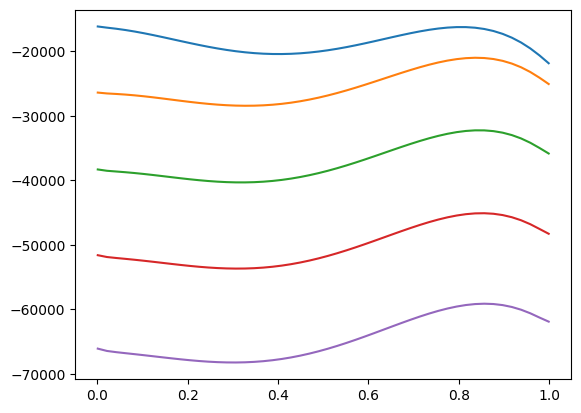

In [49]:
for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

    #plt.plot(x_al,G_gamma)
    plt.plot(x_al,G_gamma)

Problem set 2

In [15]:
#constants and initial values
wavelength = 1.5418 #in angstrom
twotheta_gamma_prime = np.array([24.73, 35.32, 43.66, 50.83, 57.40, 63.51, 74.81, 80.30, 85.63, 90.94, 96.25, 101.60, 107.10, 118.61])
twotheta_gamma = np.array([43.68, 50.84, 74.85, 90.97, 96.30, 118.68])

In [36]:
#calculating d
#grad to rad
def find_a(two_theta):
    #calculating theta in rad
    theta = np.radians(two_theta/2)
    #calculating d
    d = wavelength/(2*np.sin(theta))
    #setting a range for the values of lattice parameter, a, for testing
    a_test = np.linspace(3.50, 3.65, 1001) #this values are to have a range that covers tipycal lattice parameter vallues
    
    #calculating the error for the test values of a
    total_error = []
    for a in a_test:
        N_calc = (a/d)**2
        #difference of each value from the nearest integer
        error = np.sum((N_calc - np.round(N_calc))**2)
        total_error.append(error)
    
    #determining the best a value with the min error
    best_a_indx = np.argmin(total_error) #indice del min valor de a
    a_optim = a_test[best_a_indx] #valor de a optimo para el siguiente calculo

    #with the best a value, now we calculate N and find the a value for this N
    N = np.round((a_optim/d)**2).astype(int)
    a_new = d*np.sqrt(N) #nuevo valor para a para cada pico
    a = np.mean(a_new) #promedio de a de todos los picos

    #creating a dictionary with the hkl corresponding to N
    hkl_dict = {
        1: '100', 2: '110', 3: '111', 4: '200', 5: '210',
        6: '211', 8: '220', 9: '221', 10: '310', 11: '311',
        12: '222', 13: '320', 14: '321', 16: '400'
    }
    #extracting the hkl depending on the value of N obtained
    hkl = [hkl_dict.get(n, f'({n})') for n in N]
    
    #creating a dataframe to show the information
    results_df = pd.DataFrame({
        '2θ (deg)': two_theta,
        'd (Å)': d,
        'N': N,
        'hkl': hkl,
        'a (Å)': a
    })

    return a, results_df

In [34]:
#a value for gamma prime
#find_a(twotheta_gamma_prime)[1]
find_a(twotheta_gamma_prime)

(3.5892408596975325,
     2θ (deg)     d (Å)   N  hkl     a (Å)
 0      24.73  3.600004   1  100  3.589241
 1      35.32  2.541139   2  110  3.589241
 2      43.66  2.073126   3  111  3.589241
 3      50.83  1.796251   4  200  3.589241
 4      57.40  1.605294   5  210  3.589241
 5      63.51  1.464787   6  211  3.589241
 6      74.81  1.269086   8  220  3.589241
 7      80.30  1.195581   9  221  3.589241
 8      85.63  1.134288  10  310  3.589241
 9      90.94  1.081383  11  311  3.589241
 10     96.25  1.035317  12  222  3.589241
 11    101.60  0.994781  13  320  3.589241
 12    107.10  0.958383  14  321  3.589241
 13    118.61  0.896503  16  400  3.589241)

In [32]:
#a value for gamma
find_a(twotheta_gamma)

(3.587381560268294,
    2θ (deg)     d (Å)   N  hkl     a (Å)
 0     43.68  2.072223   3  111  3.587382
 1     50.84  1.795921   4  200  3.587382
 2     74.85  1.268507   8  220  3.587382
 3     90.97  1.081105  11  311  3.587382
 4     96.30  1.034912  12  222  3.587382
 5    118.68  0.896178  16  400  3.587382)